In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# This is for regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# This is for regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

In [4]:
df = pd.read_csv('bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.shape


(45211, 17)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

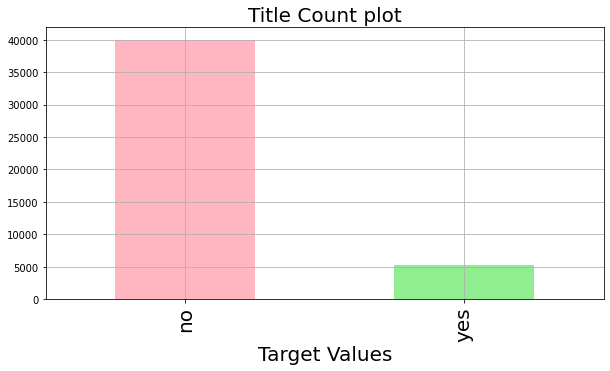

In [8]:
df["y"].value_counts().plot(kind="bar", color=['lightpink','lightgreen'],figsize=(10,5), grid=True)
plt.title('Title Count plot',fontsize=20)
plt.xlabel('Target Values',fontsize=20)
plt.xticks(fontsize=20)

<Figure size 1080x720 with 0 Axes>

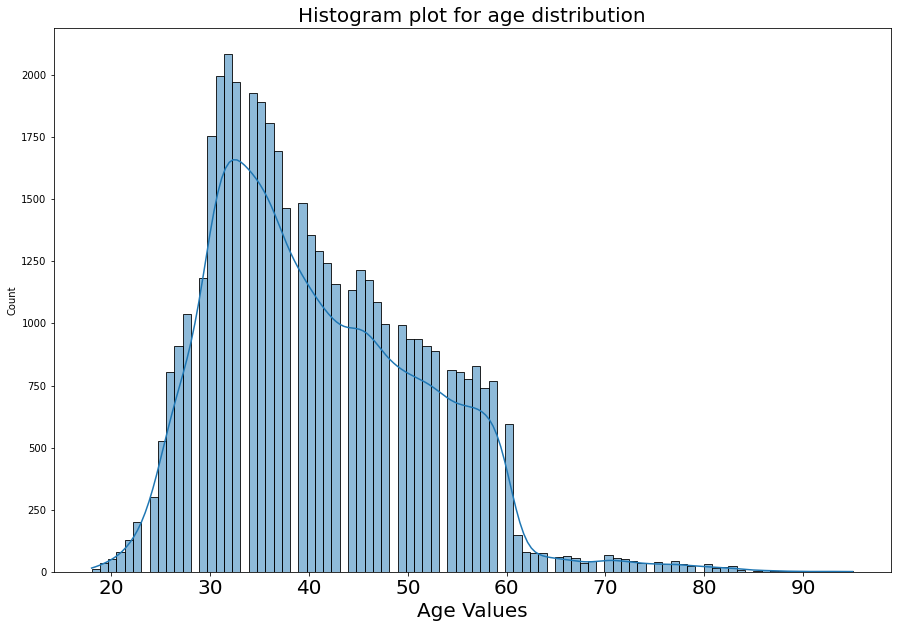

<Figure size 1080x720 with 0 Axes>

In [9]:
# Age distribution in data using histogram


plt.figure(figsize=(15,10))
sns.histplot(df.age,kde=True);

plt.title('Histogram plot for age distribution',fontsize=20)
plt.xlabel('Age Values',fontsize=20)
plt.xticks(fontsize=20)
plt.figure(figsize=(15,10))

In [10]:
pd.crosstab(df.y, df.marital)

marital,divorced,married,single
y,,,
no,4585,24459,10878
yes,622,2755,1912


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


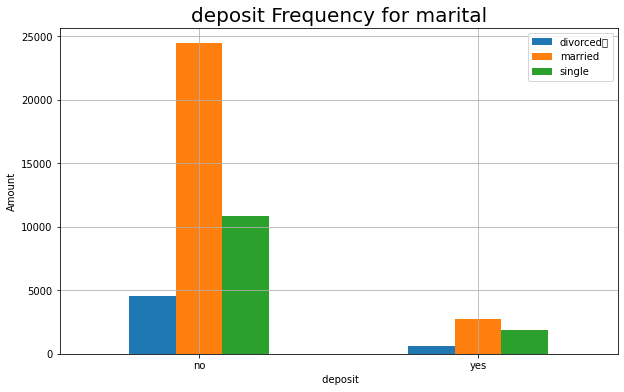

In [11]:
# Create a plot of crosstab
pd.crosstab(df.y, df.marital).plot(kind="bar",
                                    figsize=(10, 6),
                                    grid=True)
plt.title("deposit Frequency for marital",fontsize=20)
plt.xlabel(" deposit")
plt.ylabel("Amount")
plt.legend(["divorced	", "married", "single"]);
plt.xticks(rotation=0);

In [12]:
# Checking missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
#duplicate rows in each dataset
sum(df.duplicated())

0

In [14]:
df['job'].value_counts()


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [15]:
def replace_job(job):
    """
    This function codes the highest job earned.
    """
    if job == 'management':
        return 12
    elif job == 'admin.':
        return 11
    elif job == 'entrepreneur':
        return 10
    elif job == 'technician':
        return 9
    elif job == 'services':
        return 8
    elif job == 'self-employed':
        return 7
    elif job == 'blue-collar':
        return 6
    elif job == 'retired':
        return 5
    elif job == 'housemaid':
        return 4
    elif job == 'unemployed':
        return 3
    elif job == 'unknown':
        return 2
    elif job == 'student':
        return 1

df['job'] = df['job'].apply(lambda x: replace_job(x))

In [16]:
df['marital'].value_counts()


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [17]:
def replace_marital(marital):
    if marital == 'married':
        return 4
    elif marital == 'single':
        return 3
    elif marital == 'divorced':
        return 2
    elif marital == 'unknown':
        return 1

df['marital'] = df['marital'].apply(lambda x: replace_marital(x))       

In [18]:
df['education'].value_counts()


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [19]:
def replace_education(education):
    """
    This function codes the highest education attained.
    """
    if education == 'secondary':
        return 0
    elif education == 'tertiary':
        return 1
    elif education == 'primary':
        return 2
    elif education == 'unknown':
        return 3
df['education'] = df['education'].apply(lambda x: replace_education(x))

In [20]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [21]:
def replace_default(default):
    if default =='no':
        return 0
    elif default =='yes':
        return 1
    
df['default'] = df['default'].apply(lambda x: replace_default(x))


In [22]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [23]:
def replace_housing(housing):
    if housing == 'no':
        return 0
    elif housing == 'yes':
        return 1
   
df['housing'] = df['housing'].apply(lambda x: replace_housing(x))

In [24]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [25]:
def replace_loan(loan):
    if loan == 'no':
        return 0
    elif loan == 'yes':
        return 1
 
df['loan'] = df['loan'].apply(lambda x: replace_loan(x))

In [26]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [27]:
def replace_contact(contact):
    if contact == 'cellular':
        return 1
    elif contact == 'telephone':
        return 2
    elif contact == 'unknown':
        return 3
df['contact'] = df['contact'].apply(lambda x: replace_contact(x))

In [28]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [29]:
    
def replace_poutcome(poutcome):
    if poutcome == 'failure':
        return 0
    elif poutcome == 'success':
        return 1
    elif poutcome == 'unknown':
        return 3
    elif poutcome == 'other':
        return 4

df['poutcome'] = df['poutcome'].apply(lambda x: replace_poutcome(x))

In [30]:
look_up = {'aug': 8, 'nov': 11, 'jun': 6, 'apr': 4, 'jul': 7,
            'may': 5, 'oct': 10, 'mar': 3, 'sep': 9, 'dec': 12 , 'feb': 2 ,'jan': 1 }

df['month'] = df['month'].apply(lambda x: look_up[x])

In [31]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [32]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,12,4,1,0,2143,1,0,3,5,5,261,1,-1,0,3,no
1,44,9,3,0,0,29,1,0,3,5,5,151,1,-1,0,3,no
2,33,10,4,0,0,2,1,1,3,5,5,76,1,-1,0,3,no
3,47,6,4,3,0,1506,1,0,3,5,5,92,1,-1,0,3,no
4,33,2,3,3,0,1,0,0,3,5,5,198,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,4,1,0,825,0,0,1,17,11,977,3,-1,0,3,yes
45207,71,5,2,2,0,1729,0,0,1,17,11,456,2,-1,0,3,yes
45208,72,5,4,0,0,5715,0,0,1,17,11,1127,5,184,3,1,yes
45209,57,6,4,0,0,668,0,0,2,17,11,508,4,-1,0,3,no


In [33]:

# Binarize target column
df['y'] = df['y'].map({'yes':1,'no': 0})
# Save the feature data --> it should not include diagnosis
X = df.drop(columns = 'y')
# Encode our target
y = df['y']


X.shape

(45211, 16)

In [34]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,12,4,1,0,2143,1,0,3,5,5,261,1,-1,0,3,0
1,44,9,3,0,0,29,1,0,3,5,5,151,1,-1,0,3,0
2,33,10,4,0,0,2,1,1,3,5,5,76,1,-1,0,3,0
3,47,6,4,3,0,1506,1,0,3,5,5,92,1,-1,0,3,0
4,33,2,3,3,0,1,0,0,3,5,5,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,4,1,0,825,0,0,1,17,11,977,3,-1,0,3,1
45207,71,5,2,2,0,1729,0,0,1,17,11,456,2,-1,0,3,1
45208,72,5,4,0,0,5715,0,0,1,17,11,1127,5,184,3,1,1
45209,57,6,4,0,0,668,0,0,2,17,11,508,4,-1,0,3,0


In [35]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [37]:
lr = LogisticRegression() # Create the model


lr.fit(X_train, y_train) # Fit the model

lr.score(X_test, y_test) # Score the model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8866672564805804

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


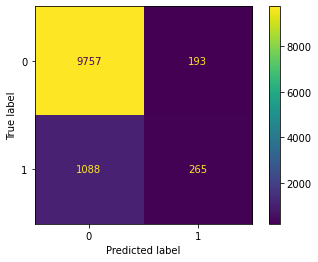

In [38]:
plot_confusion_matrix(lr, X_test, y_test);

In [39]:
lr.score(X_train, y_train)

0.8895540875309661

In [41]:
preds = lr.predict(X_test)

In [42]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9950
           1       0.58      0.20      0.29      1353

    accuracy                           0.89     11303
   macro avg       0.74      0.59      0.62     11303
weighted avg       0.86      0.89      0.86     11303



In [43]:

preds = lr.predict(X_train)
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     29972
           1       0.57      0.19      0.28      3936

    accuracy                           0.89     33908
   macro avg       0.74      0.58      0.61     33908
weighted avg       0.86      0.89      0.86     33908



In [49]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [44]:

def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    ls = [(mse), (mae), (rmse)]
    ls2 = ["MSE", "MAE", "RMSE"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict

#
print("\ntrain")

restrain = calc_cost(y_train, lr.predict(X_train))



print("\nvaldation")
res1 = calc_cost(y_test, lr.predict(X_test))


train
MSE: 0.11044591246903386
MAE: 0.11044591246903386
RMSE: 0.3323340374819195

valdation
MSE: 0.11333274351941962
MAE: 0.11333274351941962
RMSE: 0.3366492886067333


In [51]:
class_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)


In [52]:
class_forest.fit(X_train, y_train)

preds_class = class_forest.predict(X_test)

In [53]:
val_train = round(class_forest.score(X_train_sc, y_train),2)*100
val_test = round(class_forest.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 88.0%
Test Set Accuracy: 88.0%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


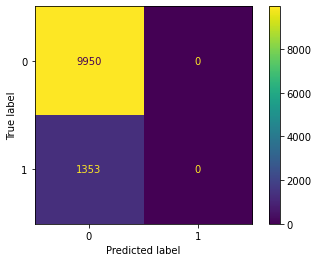

In [54]:
# We can also make a simple confusion matrix
plot_confusion_matrix(class_forest, X_test_sc, y_test);

In [55]:
y_train.value_counts(normalize=True)

0    0.883921
1    0.116079
Name: y, dtype: float64

In [56]:
y_test.value_counts(normalize=True)

0    0.880297
1    0.119703
Name: y, dtype: float64